### Add this notebook into the same folder as the in-class notebook for it to access the cars.csv dataset

# Week 4 Co-Learning: Ensemble Methods with Cars Dataset 

___

So after covering the theory behind ensemble methods, let us dive into the coding segments of today's co-learning 

___ 

We'll first have a quick recap on how to implement decision trees in Python. After that we'll move on to some data cleaning and preparation, followed by implementations of various ensemble methods and tweaking of their parameters. 

___

Now we'll first import all the necessary modules and packages. 

We'll be using Scikit-Learn as our main library for all the various classifier models we'll work with today 

In [2]:
# General modules

import numpy as np
import pandas as pd
import matplotlib
from matplotlib.legend_handler import HandlerLine2D 
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# Required Classifiers from SKLearn 

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split 

# Configuring Matplotlib 
%matplotlib inline 

# Let's have a quick recap of Descision Trees

We will use the iris dataset for a quick recap. 

The iris dataset contains various features, such as petal length, petal width and sepal width, with the target being classifying a given iris flower under its correct species. 

We would use petal length and petal width as features to predict the species of iris flower for our recap on decision trees. 

In [3]:
# Importing the dataset 

from sklearn.datasets import load_iris

In [4]:
# Loading the dataset

iris = load_iris()

In [5]:
# Selecting only the desired features of petal width and petal length for this recap
# Experiment with a only two levels in the tree (not including root node)

X = iris.data[:,2:]
y = iris.target 

iris_tree = DecisionTreeClassifier(max_depth=2)
iris_tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

So actually creating and fitting a decision tree is relatively simple. 

Earlier we mentioned that at each non-leaf node, the decision tree makes a decision that splits the samples into corresponding children nodes. If we want to know what decision each node made, we can actually visualize it. 

## Visualizing the decision tree

___ 

Let's display the decision tree in a more visually accessible format. 

___ 

We can do this in 2 ways, but let's first use the method the textbook advocates.

In [6]:
# Method 1 (textbook): Using export_graphviz
# Using export_graphviz to visualize the decision tree

export_graphviz(iris_tree, out_file='iris_tree.dot',feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

In [7]:
!dot -Tpng iris_tree.dot -o iris_tree.png

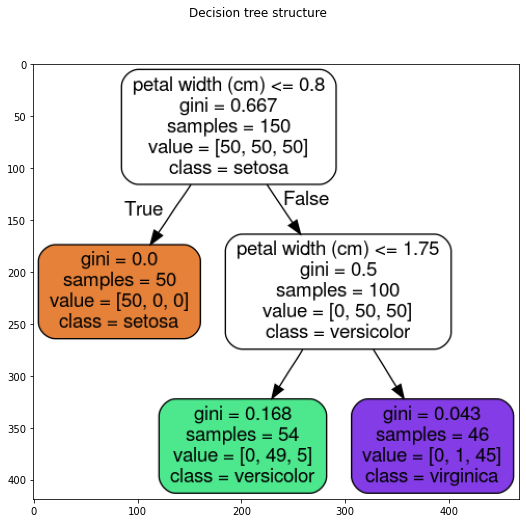

In [8]:
# Loading the image of the visualized decision tree to display it using Matplotlib

fig, axes = plt.subplots(figsize = (20, 8))
iris_img = img_to_array(load_img('./iris_tree.png'))
plt.suptitle("Decision tree structure")
plt.imshow(iris_img.astype('uint8')) 

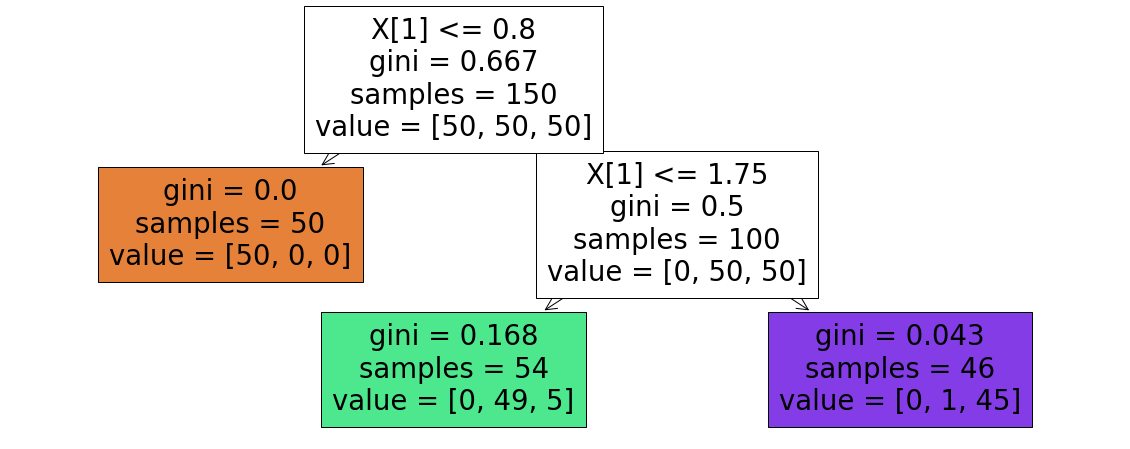

In [9]:
# Method 2 (by Scikit-Learn): Using plot_tree()

fig, axes = plt.subplots(figsize = (20, 8))
plot_tree(iris_tree, filled=True, rounded=True, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

From this image, we can see that Sklearn's Decision Tree Algorithm, CART, is a greedy algorithm that tries to place as many of one class in one children node as possible at each decision node split

(0.0, 7.88, -0.9, 3.4800000000000044)

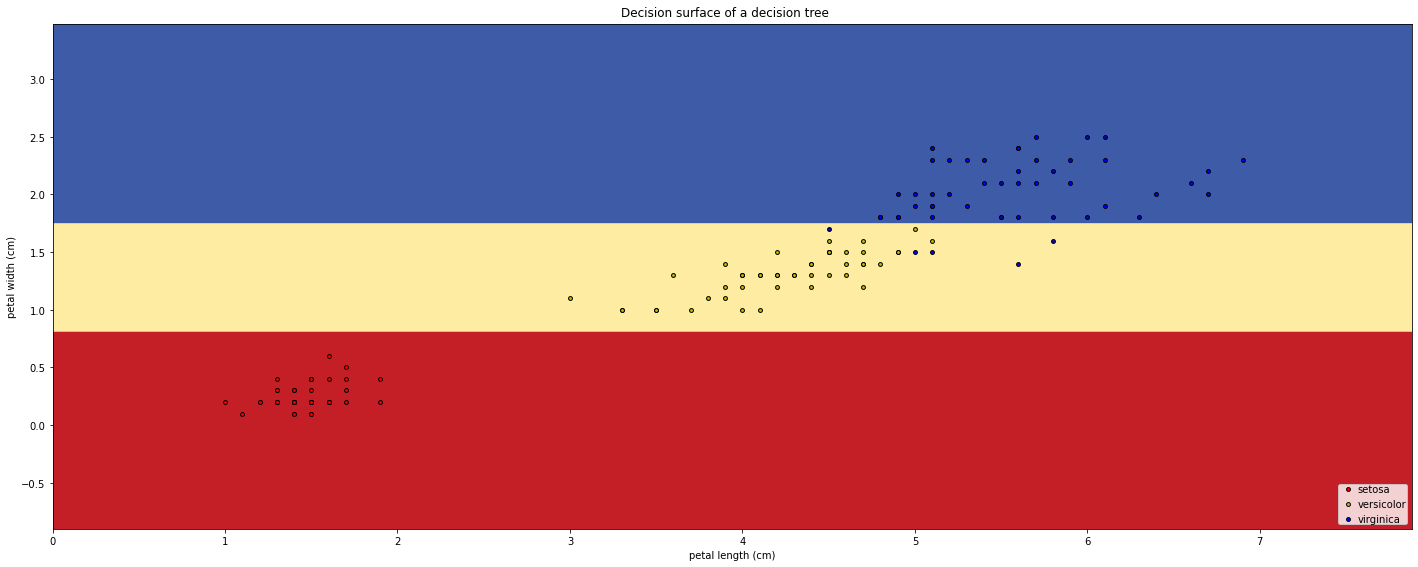

In [10]:
# Plot the decision boundary

fig, axes = plt.subplots(figsize = (20, 8))

# Determine the axes' units and ranges
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
plt.tight_layout(h_pad=1.0, w_pad=1.0, pad=2.5)

# Plotting the decision boundaries
Z = iris_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Determining the axes labels
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# Plotting the training points in the graph
for i, color in zip(range(3), 'ryb'):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

In this sense of being able to see how the model decides, decision trees are white-box models unlike Neural Networks

## Adding more layers

Instead of having 2 layers, excluding the root node, let's try a decision tree with 3 layers. We'll then visualize what differences more layers create in our model

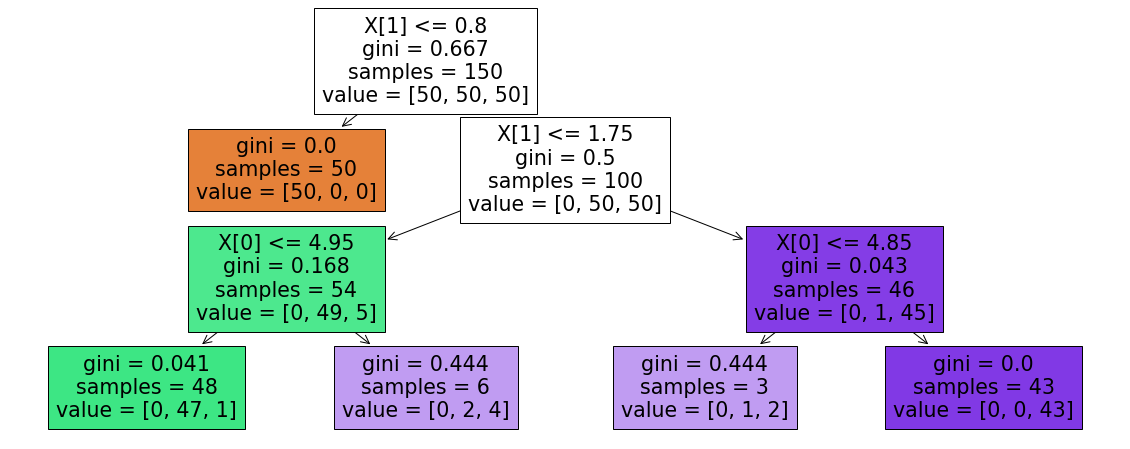

In [11]:
# Fitting again with 3 layers instead 
# ICE 

iris_tree = DecisionTreeClassifier(max_depth=3)
iris_tree.fit(X, y)

fig, axes = plt.subplots(figsize = (20, 8))
plot_tree(iris_tree, filled=True, rounded=True, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

(0.0, 7.88, -0.9, 3.4800000000000044)

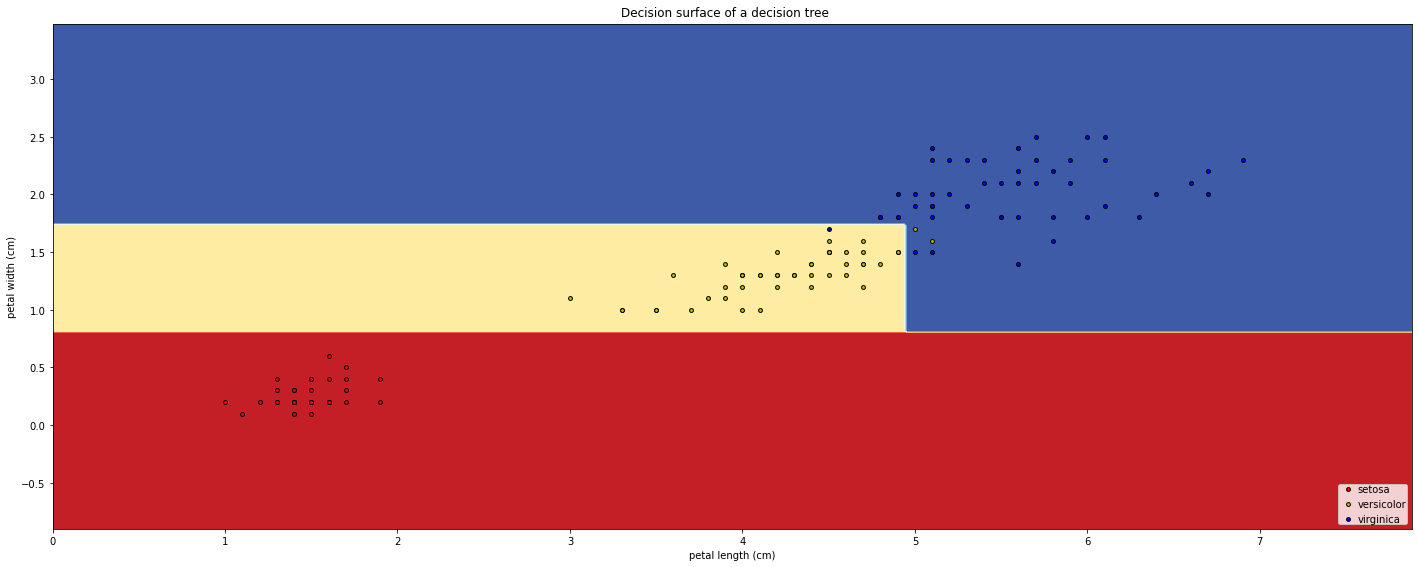

In [12]:
# Plotting the new decision boundaries
# ICE

fig, axes = plt.subplots(figsize = (20, 8))

# Determine the axes' units and ranges
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
plt.tight_layout(h_pad=1.0, w_pad=1.0, pad=2.5)

# Plotting the decision boundaries
Z = iris_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

# Determining the axes labels
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# Plotting the training points in the graph
for i, color in zip(range(3), 'ryb'):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

The model becomes slightly more precise but this can easily become a case of high variance, which leads to overfitting.

## Tweaking other hyper parameters 

What are the other hyperparameters we can tweak? 

In [ ]:
# Tweaking the other hyperparameters
# ICE 

iris_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)
iris_tree.fit(X, y)

fig, axes = plt.subplots(figsize = (20, 8))
plot_tree(iris_tree, filled=True, rounded=True, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

(0.0, 7.88, -0.9, 3.4800000000000044)

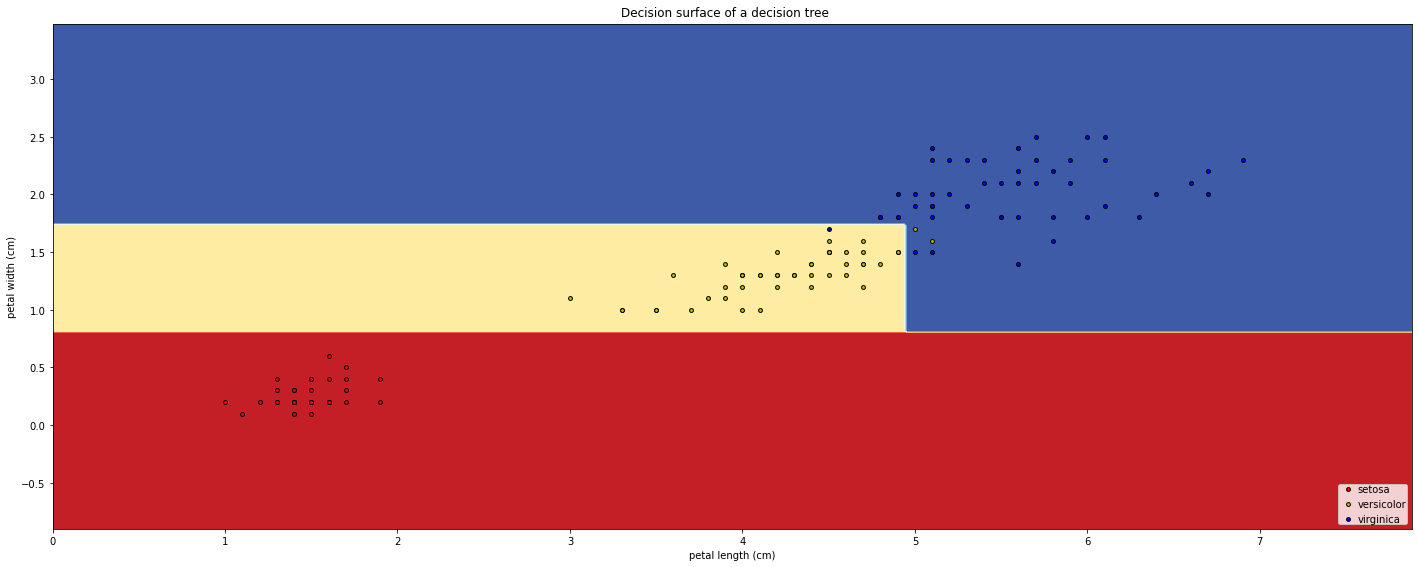

In [14]:
# Plotting the new decision boundaries
# ICE

fig, axes = plt.subplots(figsize = (20, 8))

# Determine the axes' units and ranges
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
plt.tight_layout(h_pad=1.0, w_pad=1.0, pad=2.5)

# Plotting the decision boundaries
Z = iris_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) 

# Determining the axes labels
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

# Plotting the training points in the graph
for i, color in zip(range(3), 'ryb'):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

## Gini index vs. Entropy

___

Previously Jason mentioned that there are 2 ways that a decision tree can decide to split its node by: 
  1. Gini index
  2. Entropy 

Now let's see what difference using each makes. We'll comparing between to models of 3 layers

In [ ]:
# Gini-using model
# ICE

fig, axes = plt.subplots(figsize = (20, 8))
plot_tree(iris_tree, filled=True, rounded=True, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

In [ ]:
# Entropy-using model
# ICE

iris_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
iris_tree.fit(X, y)

fig, axes = plt.subplots(figsize = (20, 8))
plot_tree(iris_tree, filled=True, rounded=True, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

As can be seen from this example, there is only minor differences between the models --- the result is the same in this case but the decision criterias are somewhat different 

___

The models we have built so far are used for classification problems, due to the nature of the dataset, but decision trees can also be used for regression problems. In that case, the __DecisionTreeRegressor__ class is used, the loss measured is MSE

## Now, we'll move on to Ensemble Learning methods proper

# Ensemble Learning 

### We'll go through the implementation of the various ensemble methods that were introduced in the following part, namely: 
  1. Voting Classifier
  2. Bagging Classifier
  3. Random Forests
  4. Adaboost
  5. Gradient Boosting 

___

But as always, before we start fitting the models, we have to clean and prepare the data, as well as, conduct some basic Exploratory Data Analysis (EDA). 

## Data Cleaning, EDA and Data Preparation

Data Cleaning: 
  1. Reviewing cars data and data types
  2. Removing null values

EDA: 
  1. Looking at the statistical summary of our data
  2. Observing correlation in our data
  3. Observing spread of each feature in our data
  4. Observing the distribution of our target class

Data Preparation: 
  1. Split into training and testing datasets

In [17]:
# Loading our data from storage 

df = pd.read_csv('../input/carsdata/cars.csv', skipinitialspace=True, na_values=' ')
# Skipinitialspace remove whitespaces before titles and na_values determines what are considered null values 

### Reviewing Cars_data

In [18]:
# Initial look at data

df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [19]:
# Statistical summary of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


It seems our dataset contains quite a few null values, let's take a look at the null values and determine whether to fill or drop them 

### Dropping null values 

In [20]:
# Check null values in 'cubicinches' column
# ICE

df['cubicinches'][pd.isna(df['cubicinches'])]

40    NaN
180   NaN
Name: cubicinches, dtype: float64

In [21]:
# Check null values in 'weightlbs' column
# ICE

df['weightlbs'][pd.isna(df['weightlbs'])]

14    NaN
33    NaN
172   NaN
Name: weightlbs, dtype: float64

Given the small number of null records compared to the whole dataset and the difficulty in giving a suitable fill value for these null values, we should proceed to drop them. 

In [22]:
df = df.dropna(how='any')

Let us have a quick look at the dataset again

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          256 non-null    float64
 1   cylinders    256 non-null    int64  
 2   cubicinches  256 non-null    float64
 3   hp           256 non-null    int64  
 4   weightlbs    256 non-null    float64
 5   time-to-60   256 non-null    int64  
 6   year         256 non-null    int64  
 7   brand        256 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 18.0+ KB


In [24]:
df.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,23.187109,5.589844,201.351562,106.800781,3006.445312,15.496094,1976.828125
std,7.870573,1.746631,109.572151,40.686792,855.572147,2.905030,3.635575
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.800000,4.000000,100.250000,75.000000,2245.750000,14.000000,1974.000000
50%,22.000000,5.000000,156.000000,95.000000,2832.500000,16.000000,1977.000000
75%,28.850000,8.000000,304.000000,139.000000,3666.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


### Observing the correlation of the data, the distribution of features and target classes

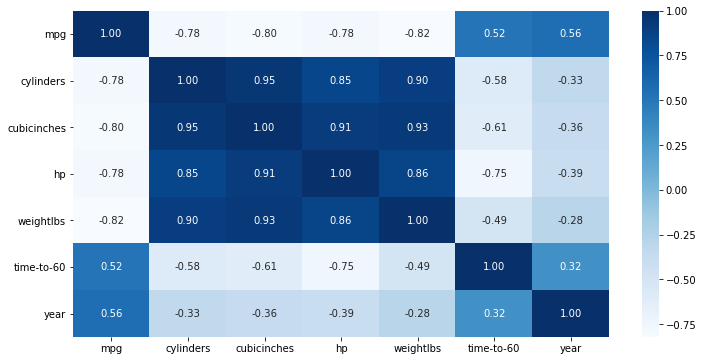

In [25]:
# Plotting correlation map

fig, axes = plt.subplots(figsize = (12, 6))

correlation = df.corr()

corr_m = sns.heatmap(round(correlation, 2), annot=True, cmap='Blues', ax=axes, fmt='.2f')

Correlation of data can be used to help reduce the dimensionality of models in some cases by removing features that are redundant (of very high correlation)

In [26]:
# Function to help plot the distribution of our features

def features_hist(df, features, fig_size, xsize=8, ysize=8):
    df[features].hist(bins=20, xlabelsize=xsize, ylabelsize=ysize, grid=False, figsize=fig_size,color='blue')

    plt.tight_layout(rect=(0,0,1.2,1.2))

    plt.show()

In [27]:
# Separating the dataframe into features and labels
# ICE 

X = df.iloc[:,:7] 

X

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978
...,...,...,...,...,...,...,...
256,17.0,8,305.0,130,3840.0,15,1980
257,36.1,4,91.0,60,1800.0,16,1979
258,22.0,6,232.0,112,2835.0,15,1983
259,18.0,6,232.0,100,3288.0,16,1972


In [28]:
y = df['brand']

y

0          US.
1      Europe.
2          US.
3          US.
4          US.
        ...   
256        US.
257     Japan.
258        US.
259        US.
260        US.
Name: brand, Length: 256, dtype: object

In [29]:
# Features of our dataset

features = list(df.columns[:7])

features

['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']

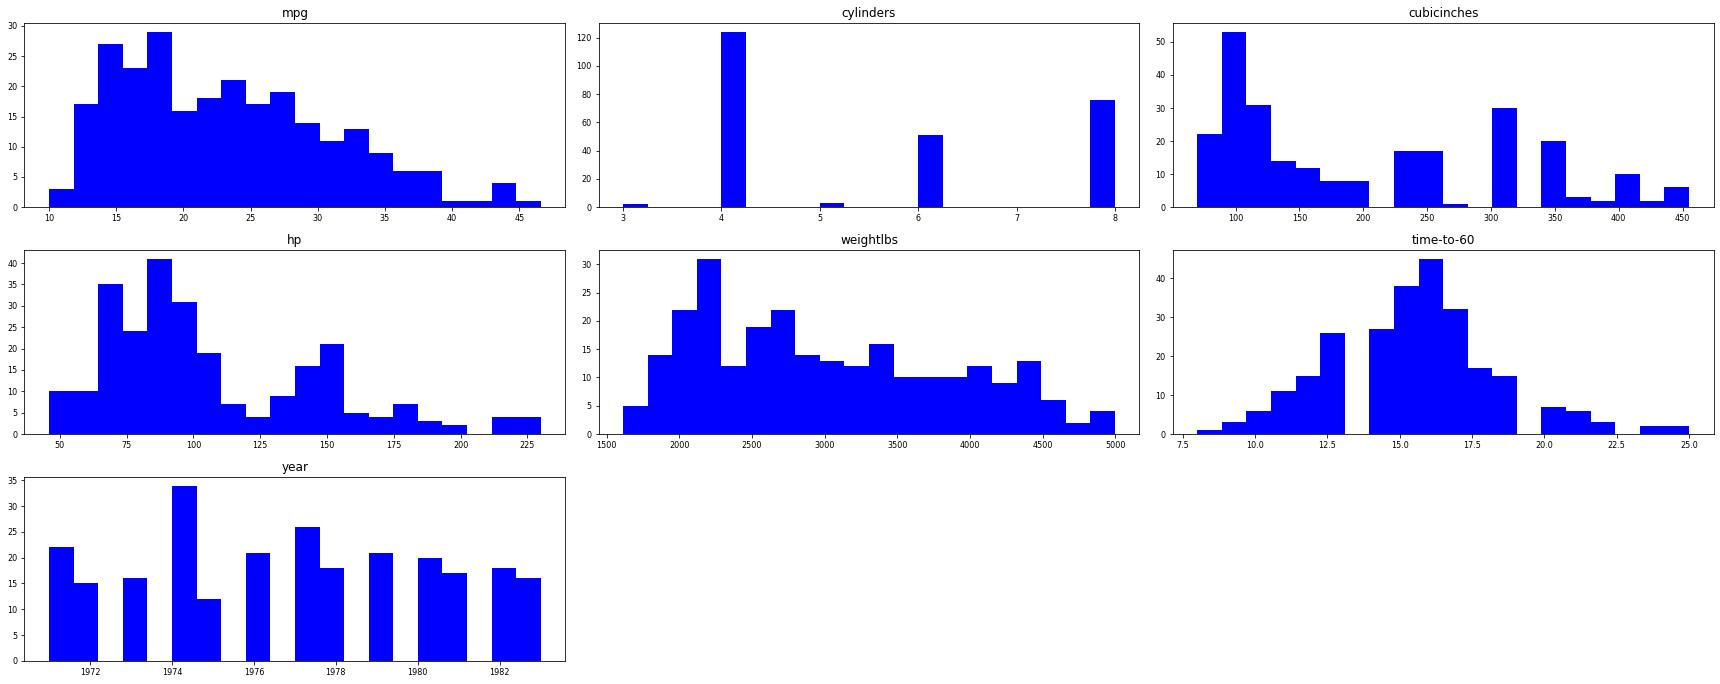

In [30]:
features_hist(df, features, (20,8))

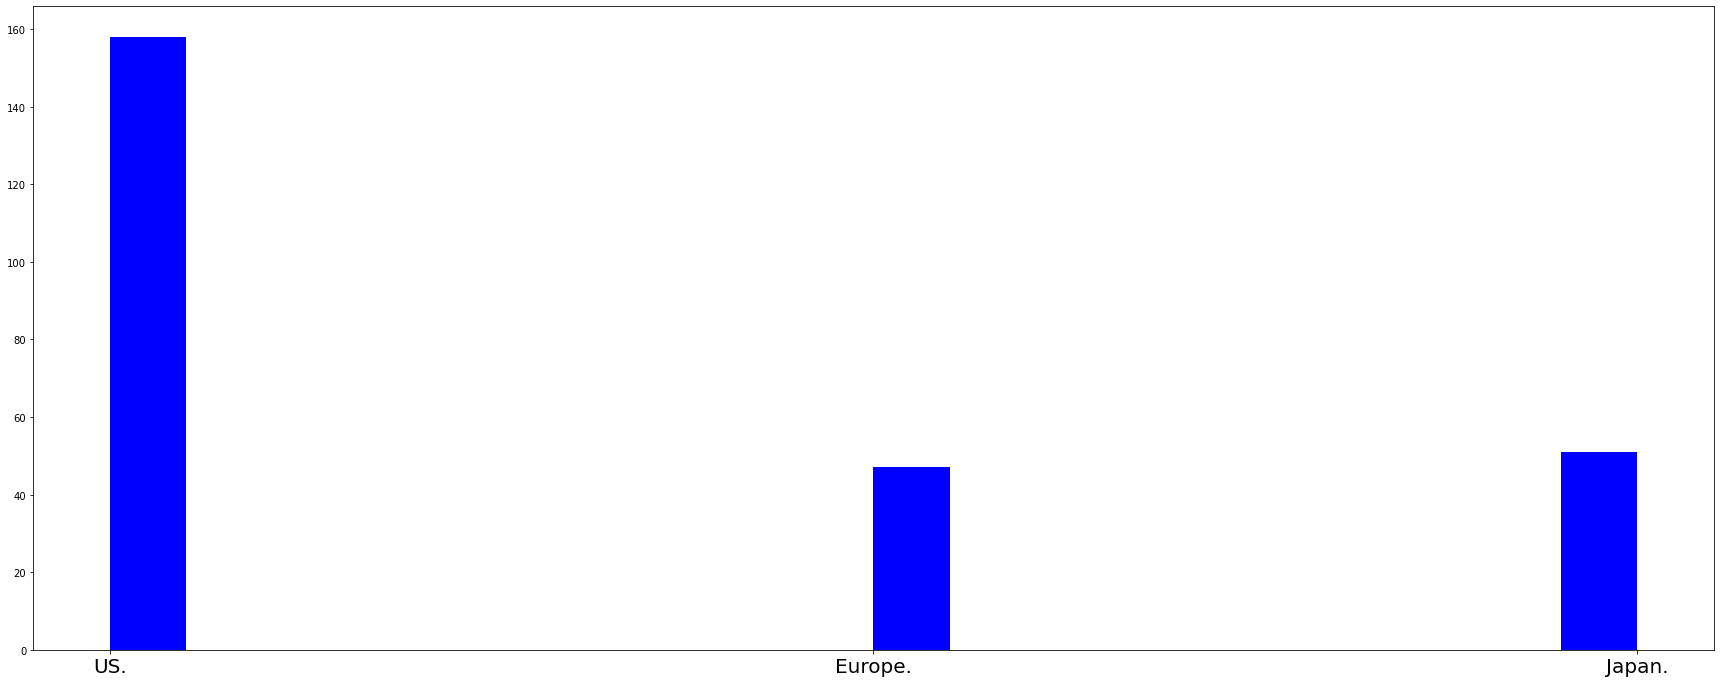

In [31]:
features_hist(df, 'brand', (20, 8), xsize=20, ysize=10)

In [32]:
df['brand'].value_counts()

US.        158
Japan.      51
Europe.     47
Name: brand, dtype: int64

### Now let us split the cars dataset into training and test datasets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)

# ALTERNATIVE 

# train_perc = 0.85 

# train_index = ceil(len(df) * 0.85)
# print(train_index)

# X_train = X.iloc[:train_index] 
# X_test = X.iloc[train_index:]

# y_train = y[:train_index]
# y_test = y[train_index:]

In [34]:
decisiontree_results = []

In [37]:
cars_tree = DecisionTreeClassifier(min_samples_leaf=7)

cars_tree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=7)

In [38]:
decisiontree_results.append(cars_tree.score(X_test, y_test))

for result in decisiontree_results: 
    print(result)

[0.8461538461538461, 0.7692307692307693]


## Voting Classifier

Before we delve into specific ensemble techniques, let us construct a basic ensemble method model from scratch, using a voting classifier, as covered by Jiaying earlier. We'll be using a hard voting classifier. 

___

As mentioned earlier, a hard-voting classifier is made up of a collection of weak learners, with the final decision being decided by hard voting. 

___

We'll be using a logistic regression model, a decision tree classifier and a k-nearest neighbour classifier in our Voting classifier

In [45]:
# Forming the hard-voting classifier 

voter = VotingClassifier(estimators=[('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('svc', SVC())], voting='hard', n_jobs=-1)

# Fitting the VotingClassifier 

results = [] 

voter.fit(X_train, y_train)

# VotingClassifier accuracy

results.append(f"VotingClassifier Accuracy: {accuracy_score(y_test, voter.predict(X_test))}")

In [46]:
# Fitting individual classifiers

log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier(max_depth=3)
svc = SVC() 

log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Checking accuracy of different classifiers

results.append(f"LogisticRegression Accuracy: {accuracy_score(y_test, log_reg.predict(X_test))}")
results.append(f"DecisionTreeClassifier Accuracy: {accuracy_score(y_test, dec_tree.predict(X_test))}")
results.append(f"Support Vector Machine Accuracy: {accuracy_score(y_test, svc.predict(X_test))}")

for result in results: 
    print(result)

VotingClassifier Accuracy: 0.7948717948717948
LogisticRegression Accuracy: 0.7435897435897436
DecisionTreeClassifier Accuracy: 0.717948717948718
Support Vector Machine Accuracy: 0.717948717948718


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


If we compare the accuracy of the Voting Classifier, we can see the difference an ensemble of weak learners can make. 

--- 

If we used soft-voting instead, which means deciding by probability, the accuracy would potentially be even higher. 

## Bagging Classifier

In using a Bagging Classifier, we use random sampling to train various weak learners, forming an ensemble. The randomness of the sample each learner fits to help make better and more accurate predictions. 

___ 

The BaggingClassifier class can be used for both bagging and pasting, we just need to change the parameter bootstrap to False 

In [49]:
# Fitting a BaggingClassifier
# ICE 

bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, bootstrap=True, n_jobs=-1)

bag.fit(X_train, y_train)

# ICE 

print(f"Accuracy: {accuracy_score(y_test, bag.predict(X_test))}")

Accuracy: 0.7692307692307693


If we're just using a bagging classifier with decision trees as its weak learners, we can just directly use the RandomForestClassifier, which is essentially an ensemble method working in a similar way. 

___

Bagging classifiers can, of course, use different weak learner models. 

## Bagging - Random Forests

Now let's have a look at Bagging ensemble methods using Random Forests

In [50]:
# Fitting a Random Forest model

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Random Forest accuracy

y_pred = rf.predict(X_test)
print(f"accuracy score: {accuracy_score(y_test, y_pred)}")

accuracy score: 0.8461538461538461


We can actually access the importance of a feature across all the estimators trained in a random forest using sklearn's feature_importances_ variable

In [52]:
# Print feature importance

for name, importance in zip(features, rf.feature_importances_): 
    print(name, importance)

mpg 0.11855208701258908
cylinders 0.10623322712828852
cubicinches 0.26615971581309295
hp 0.1424170415507286
weightlbs 0.18682823206981006
time-to-60 0.08718124835058581
year 0.09262844807490495


Let's tweak some hyperparameters to see the differences in performance. 

In [59]:
# Results for different hyperparameters
# ICE 

n_estimators = [5, 10, 50, 100, 150, 300]
train_results = []
test_results = []

for estimator in n_estimators: 
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    train_results.append(accuracy_score(y_train, train_pred))
    test_pred = rf.predict(X_test)
    test_results.append(accuracy_score(y_test, test_pred)) 

print('Train\t\t\tTest')
for i in range(len(n_estimators)):
    print(f"{i+1}: {round(train_results[i], 5):.5f}\t\t{round(test_results[i],5):.5f}")

Train			Test
1: 0.96774		0.76923
2: 0.98618		0.76923
3: 1.00000		0.84615
4: 1.00000		0.84615
5: 1.00000		0.84615
6: 1.00000		0.82051


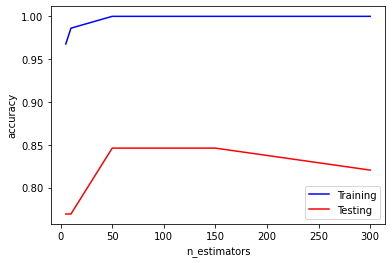

In [60]:
# Graphical representation

line1 = plt.plot(n_estimators, train_results, 'b', label='Training')
line2 = plt.plot(n_estimators, test_results, 'r', label='Testing') 
plt.legend(handler_map={'line1':HandlerLine2D(numpoints=2)})
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

## Boosting - AdaBoost 

For boosting techniques, we have 2 common kinds, the first will be AdaBoost. 

In [61]:
# Fitting an AdaBoost model

am = AdaBoostClassifier(n_estimators=100, learning_rate=1)
adaboostmodel = am.fit(X_train, y_train)

y_pred = adaboostmodel.predict(X_test)
print(f"accuracy score: {accuracy_score(y_test, y_pred)}")

accuracy score: 0.7948717948717948


In [62]:
# Tweaking hyperparameters
# ICE 

n_estimators = [5, 10, 50, 100, 150, 300]
train_results = []
test_results = []

for estimator in n_estimators: 
    am = AdaBoostClassifier(n_estimators=estimator, learning_rate=1)
    adamodel = am.fit(X_train, y_train)
    
    train_pred = adamodel.predict(X_train)
    train_results.append(accuracy_score(y_train, train_pred))
    test_pred = adamodel.predict(X_test)
    test_results.append(accuracy_score(y_test, test_pred)) 

print('Train\t\t\tTest')
for i in range(len(n_estimators)):
    print(f"{i+1}: {round(train_results[i], 5):.5f}\t\t{round(test_results[i],5):.5f}")

1: 0.76498		0.79487
2: 0.84332		0.74359
3: 0.88479		0.76923
4: 0.90783		0.79487
5: 0.88018		0.71795
6: 0.91705		0.74359


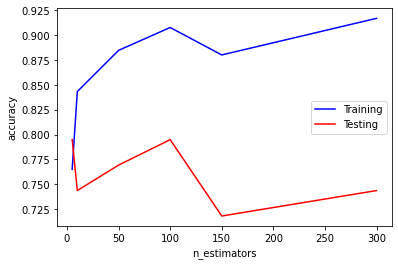

In [64]:
line1 = plt.plot(n_estimators, train_results, 'b', label='Training')
line2 = plt.plot(n_estimators, test_results, 'r', label='Testing') 
plt.legend(handler_map={'line1':HandlerLine2D(numpoints=2)})
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

How about tweaking the learning rate? 

In [65]:
# ICE

n_lr = [0.4, 0.8, 1.0, 1.4, 1.8, 2.0]
train_results = []
test_results = []

for lr in n_lr: 
    am = AdaBoostClassifier(n_estimators=300, learning_rate=lr)
    adamodel = am.fit(X_train, y_train)
    
    train_pred = adamodel.predict(X_train)
    train_results.append(accuracy_score(y_train, train_pred))
    test_pred = adamodel.predict(X_test)
    test_results.append(accuracy_score(y_test, test_pred)) 

print('Train\t\t\tTest')
for i in range(len(n_lr)):
    print(f"{i+1}: {round(train_results[i], 5):.5f}\t\t{round(test_results[i],5):.5f}")

1: 0.92627		0.74359
2: 0.90323		0.74359
3: 0.91705		0.74359
4: 0.91705		0.76923
5: 0.95392		0.79487
6: 0.81106		0.71795


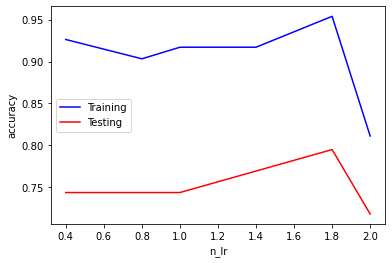

In [66]:
line1 = plt.plot(n_lr, train_results, 'b', label='Training')
line2 = plt.plot(n_lr, test_results, 'r', label='Testing') 
plt.legend(handler_map={'line1':HandlerLine2D(numpoints=2)})
plt.xlabel('n_lr')
plt.ylabel('accuracy')
plt.show()

## Boosting - Gradient Boosting

The other boosting technique is Gradient Boosting. 

___

We'll be using a Classifier instead of a Regressor due to the nature of our dataset, but both regressors and classifiers can use the gradient boosting method.

In [67]:
# Fitting the Gradient Boosting model

gm = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=1)
gradboostmodel = gm.fit(X_train, y_train)

y_pred = gradboostmodel.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8461538461538461


In [68]:
# Tweaking the hyperparameters
# ICE

n_estimators = [5, 10, 50, 100, 150, 300]
train_results = []
test_results = []

for estimator in n_estimators: 
    gm = GradientBoostingClassifier(max_depth = 2, n_estimators=estimator, learning_rate=1)
    gradmodel = gm.fit(X_train, y_train)
    
    train_pred = gradmodel.predict(X_train)
    train_results.append(accuracy_score(y_train, train_pred))
    test_pred = gradmodel.predict(X_test)
    test_results.append(accuracy_score(y_test, test_pred)) 

print('Train\t\t\tTest')
for i in range(len(n_estimators)):
    print(f"{i+1}: {round(train_results[i], 5):.5f}\t\t{round(test_results[i],5):.5f}")

1: 0.97235		0.74359
2: 1.00000		0.84615
3: 1.00000		0.82051
4: 1.00000		0.82051
5: 1.00000		0.82051
6: 1.00000		0.82051


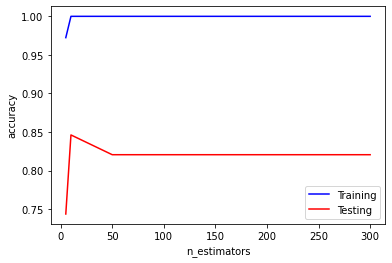

In [69]:
line1 = plt.plot(n_estimators, train_results, 'b', label='Training')
line2 = plt.plot(n_estimators, test_results, 'r', label='Testing') 
plt.legend(handler_map={'line1':HandlerLine2D(numpoints=2)})
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [70]:
# Tweaking the learning rate
# ICE

n_lr = [0.4, 0.8, 1.0, 1.4, 1.8, 2.0]
train_results = []
test_results = []

for lr in n_lr: 
    gm = GradientBoostingClassifier(max_depth = 2, n_estimators=100, learning_rate=lr)
    gradmodel = gm.fit(X_train, y_train)
    
    train_pred = gradmodel.predict(X_train)
    train_results.append(accuracy_score(y_train, train_pred))
    test_pred = gradmodel.predict(X_test)
    test_results.append(accuracy_score(y_test, test_pred)) 

print('Train\t\t\tTest')
for i in range(len(n_lr)):
    print(f"{i+1}: {round(train_results[i], 5):.5f}\t\t{round(test_results[i],5):.5f}")

1: 1.00000		0.84615
2: 1.00000		0.84615
3: 1.00000		0.82051
4: 1.00000		0.87179
5: 0.11982		0.23077
6: 0.70968		0.76923


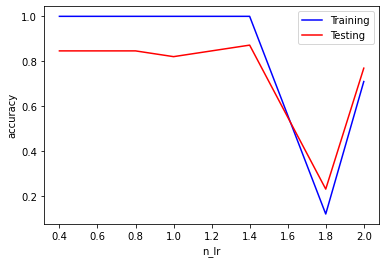

In [71]:
line1 = plt.plot(n_lr, train_results, 'b', label='Training')
line2 = plt.plot(n_lr, test_results, 'r', label='Testing') 
plt.legend(handler_map={'line1':HandlerLine2D(numpoints=2)})
plt.xlabel('n_lr')
plt.ylabel('accuracy')
plt.show()

# That's all for today's Co-Learning session and hope this session was useful for you all!